<p style="text-align:center;"><img src="https://i.pinimg.com/originals/fe/7c/f8/fe7cf85130d8be56e5eedb8d63fda1da.gif" width="100%" height="100%" alt="HTML5 Doctor Logo" /></p>

<B><h1 style="text-align:center;"> Import </h1></B>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<B><h1 style="text-align:center;"> Upload datasets </h1></B>

In [117]:
ratings = pd.read_csv('../Anime Recommendation System/Data/rating.csv')
anime   = pd.read_csv('../Anime Recommendation System/Data/anime.csv')

<b><h1 style="text-align:center; color:green" id="EDA"> EDA part </h1></b>
<b><h3 style="text-align:center;"> Preview Ratings dataset </h3></b>

In [118]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Replacing "rating" column with "user_rating" because the anime dataset already has "rating column". Looking for merging them.

In [119]:
ratings['user_rating'] = ratings['rating']
ratings.drop('rating', axis=1, inplace = True)
ratings.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


<h3 style="text-align:center;"> Preview Anime dataset </h3>

In [120]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<h3 style="text-align:center;"> View the number of rows and columns in our dataset </h3>

In [121]:
print(f'Shape of ratings:{ratings.shape}\nShape of anime:{anime.shape}')

Shape of ratings:(7813737, 3)
Shape of anime:(12294, 7)


<h3 style="text-align:center;"> View the number of unique values foreach column </h3>

In [122]:
anime.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

<h3 style="text-align:center;"> "name" column analysis </h3>

In [123]:
anime['name'].isna().sum()

0

In [124]:
anime[anime.duplicated(['name'])]

,anime_id,name,genre,type,episodes,rating,members
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


In [125]:
anime[(anime['name'] == 'Saru Kani Gassen')|(anime['name'] == 'Shi Wan Ge Leng Xiaohua')]

,anime_id,name,genre,type,episodes,rating,members
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


<h3 style="text-align:center;"> "genre column analysis" </h3>

In [126]:
anime['genre'].isna().sum()

62

In [127]:
anime['genre'].value_counts().sort_values(ascending=False).head(20)

Hentai                   823
Comedy                   523
Music                    301
Kids                     199
Comedy, Slice of Life    179
Dementia                 137
Fantasy, Kids            128
Fantasy                  114
Comedy, Kids             112
Drama                    107
Drama, Kids              105
Slice of Life             99
Kids, Music               95
Comedy, Fantasy, Kids     81
Adventure, Kids           80
Adventure                 79
Adventure, Fantasy        78
Action, Mecha, Sci-Fi     77
Comedy, Parody            74
Historical                68
Name: genre, dtype: int64

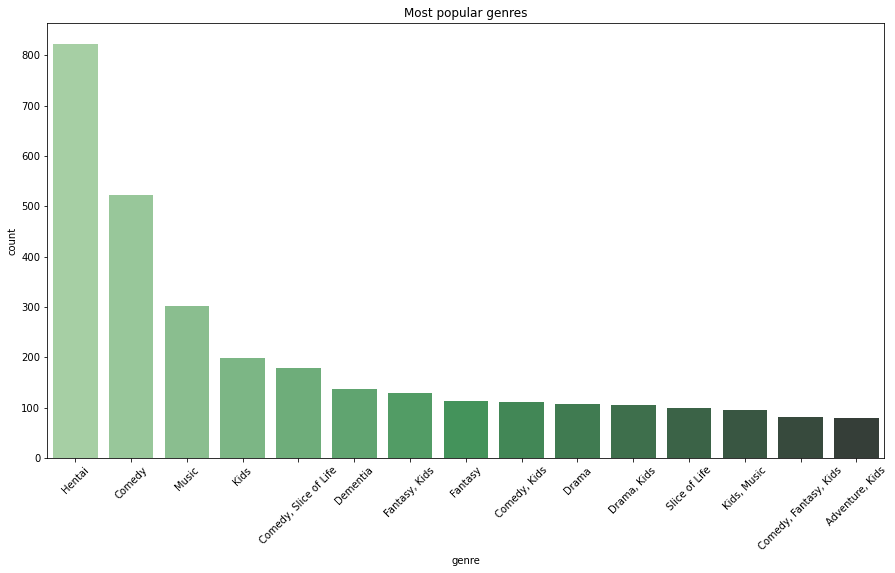

In [128]:
plt.figure(figsize=(15, 8))
plt.title('Most popular genres')
sns.countplot(x='genre', data=anime, palette="Greens_d", order=anime['genre'].value_counts().iloc[:15].index)
plt.xticks(rotation=45)
plt.show()

<b><h3 style="text-align:center;"> "type" column analysis </h3></b>

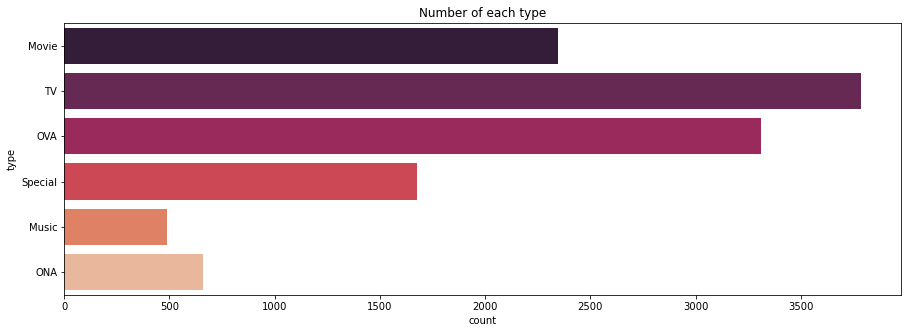

In [129]:
plt.figure(figsize=(15, 5))
plt.title('Number of each type')
sns.countplot(y='type', data=anime, palette='rocket')
plt.show()

<b><h3 style="text-align:center;"> "rating" column analysis</h3></b>

In [130]:
anime.dropna(inplace=True)

In [131]:
anime['rating'].value_counts().sort_values(ascending=False).head(15)

6.00    141
7.00     98
6.50     90
6.25     84
5.00     76
6.75     72
6.67     68
6.38     67
6.80     67
5.67     66
6.73     64
7.33     64
6.34     63
6.81     63
6.33     62
Name: rating, dtype: int64

In [132]:
anime['rating'].isna().sum()

0

In [133]:
anime['rounded_rating'] = anime['rating'].apply(lambda x: round(x))
anime.head()

,anime_id,name,genre,type,episodes,rating,members,rounded_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9


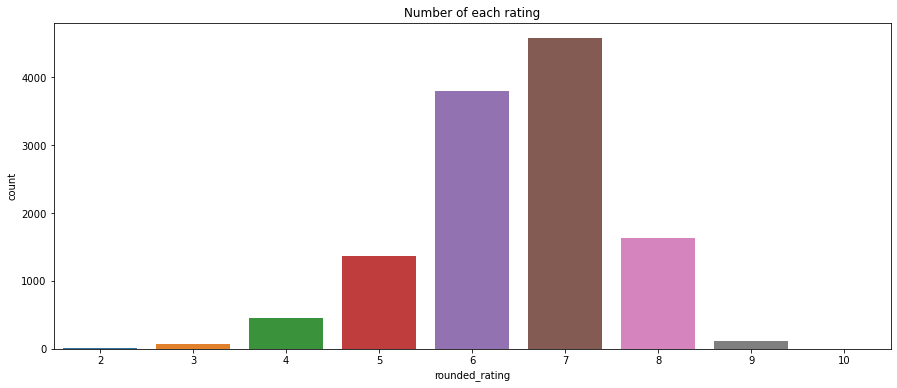

In [134]:
plt.figure(figsize=(15,6))
sns.countplot(data=anime, x='rounded_rating')
plt.title('Number of each rating')
plt.show()

In [135]:
ratings.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


When the users didn't leave rating it was set to -1, so lets drop them

In [136]:
ratings['user_rating'] = ratings['user_rating'].apply(lambda x: np.nan if x == -1 else x)
ratings.dropna(inplace=True)
ratings.head()

,user_id,anime_id,user_rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0


Getting the average user rating to each anime

In [137]:
user_ratings = ratings.groupby(['anime_id'], as_index=False)['user_rating'].mean()

Merging datasets

In [138]:
anime_user_rating = pd.merge(anime, user_ratings, on='anime_id')

In [139]:
anime_user_rating.head(3)

,anime_id,name,genre,type,episodes,rating,members,rounded_rating,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9,9.426313
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9,9.322741
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9,9.449495


Recommendation engine

Choosing the columns that i think are important

In [140]:
columns = ['name','genre','type','rating','user_rating']

In [141]:
anime_user_rating[columns].isna().sum()

name           0
genre          0
type           0
rating         0
user_rating    0
dtype: int64

Create the column with all these important columns together

In [142]:
def get_important_features(data):
    important_features = []
    for i in range(0, data.shape[0]):
                   important_features.append(data['name'][i]+' '+data['genre'][i]+' '+data['type'][i]+' '+str(data['rating'][i])+' '+str(data['user_rating'][i]))
                   
    return important_features

In [143]:
anime_user_rating['important_features'] = get_important_features(anime_user_rating)

In [144]:
anime_user_rating.head(3)

,anime_id,name,genre,type,episodes,rating,members,rounded_rating,user_rating,important_features
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9,9.426313,"Kimi no Na wa. Drama, Romance, School, Superna..."
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9,9.322741,"Fullmetal Alchemist: Brotherhood Action, Adven..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9,9.449495,"Gintama° Action, Comedy, Historical, Parody, S..."


In [145]:
cm = CountVectorizer().fit_transform(anime_user_rating['important_features'])

In [146]:
cs = cosine_similarity(cm)
print(cs)

[[1.         0.0836242  0.         ... 0.         0.10660036 0.09090909]
 [0.0836242  1.         0.24019223 ... 0.         0.         0.        ]
 [0.         0.24019223 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.31622777 0.26967994]
 [0.10660036 0.         0.         ... 0.31622777 1.         0.74620251]
 [0.09090909 0.         0.         ... 0.26967994 0.74620251 1.        ]]


In [190]:
title = 'Bleach'
anime_id = anime_user_rating[anime_user_rating['name'] == title]['anime_id'].values[0]

In [191]:
print(anime_id)

269


In [192]:
scores = list(enumerate(cs[anime_id]))

In [194]:
sorted_scores = sorted(scores, key = lambda x: x[1], reverse=True)
sorted_scores = sorted_scores[1:]

In [195]:
j = 0
print('The 5 most recommended anime to', title, 'are:\n' )
for item in sorted_scores:
    movie_title = anime_user_rating[anime_user_rating['anime_id'] == item[0]]['name'].values[0]
    print(j+1, movie_title)
    j += 1
    if j > 4:
        break

The 5 most recommended anime to Bleach are:

1 Karin
2 Mononoke
3 Sugar Bunnies
4 Osakana wa Ami no Naka
5 Kyouhaku: Owaranai Ashita
